In [1]:
from tensorflow.keras.datasets import mnist

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [9]:
# others pieces of the model
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
# preprocessing the data
# all values in the [0, 1] interval
# confused
train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [12]:
# fit the data (training)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.2544 - accuracy: 0.9270
Epoch 2/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1018 - accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0680 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0495 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0365 - accuracy: 0.9892


In [13]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([1.4804604e-09, 1.9277409e-10, 7.2296768e-07, 3.2042451e-05,
       9.6525843e-12, 3.0070353e-08, 4.7093373e-13, 9.9996650e-01,
       7.3518867e-09, 7.0849688e-07], dtype=float32)

In [31]:
predictions[1].argmax()

2

In [20]:
# evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc: {}".format(test_acc))

10000/10000 [==============================] - 0s 31us/sample - loss: 0.0672 - accuracy: 0.9801
test_acc: 0.9800999760627747


In [22]:
import matplotlib.pyplot as plt


In [26]:
digit = train_images[4]

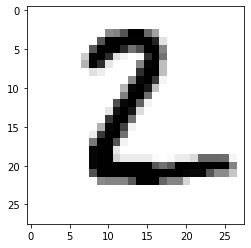

In [32]:
digit = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
train_labels[4]

9